<div class="alert alert-info">
<u><strong>Authors:</strong></u> <b>Oxoli Daniele</b> (daniele.oxoli@polimi.it), <b>Emanuele Capizzi</b> (emanuele.capizzi@polimi.it) - 2022 - Politecnico di Milano, Italy <br>
<strong>License:</strong> MIT
</div>

<div class="alert alert-block alert-success">
<h1>WEkEO2Pydash - Explore Copernicus data interactively using the WEkEO HDA API</h1></div>

**WEkEO Jupyter Notebook competition:** https://notebook.wekeo.eu (**Track A**: *Exploit the broad range
of Copernicus Data*)

# NOTEBOOK INTRODUCTION

### Outline

This Notebook showcases Python recipes to interact (access, browse, display and download) with the Copernicus data dispatched by the [<span style='color:Blue'>WEkEO DIAS</span>](https://www.wekeo.eu), through the development of flexible and interactive dashboards into a Jupyter notebook. 

**Interactivity** is here used as the key element to speed-up applications development by minimizing code editing for recursive steps such as variables definition and parameters setting.

The final goal is to provide the user with reusable code blocks which can be adapted *- with a small effort -* to manifold EO applications by leveraging the [<span style='color:Blue'>WEkEO Harmonised Data Access (HDA) API </span>](https://www.wekeo.eu/docs/harmonised-data-access-api) as exclusive data endpoint. 

### Resources

This Notebook make extensive use of the [<span style='color:Blue'> WEkEO HDA API</span>](https://www.wekeo.eu/docs/harmonised-data-access-api) to perform `GET` and `POST` requests[<sup>1</sup>](#1), necessary for automating the data access procedures.

Interactivity is enabled by cutting-edge Python libraries for dynamic widgets and maps generation including [<span style='color:Blue'>IPython</span>](https://ipython.org), [<span style='color:Blue'>itables</span>](https://mwouts.github.io/itables/advanced_parameters.html), [<span style='color:Blue'>IPyWidgets</span>](https://ipywidgets.readthedocs.io/en/latest/index.html#) and [<span style='color:Blue'>ipyleaflet</span>](https://ipyleaflet.readthedocs.io); alongside popular data mananging and analysis libraries such as [<span style='color:Blue'>Pandas</span>](https://pandas.pydata.org) and [<span style='color:Blue'>xarray</span>](https://docs.xarray.dev). All the selected libraries are released under open-license[<sup>2</sup>](#2) compatible with [<span style='color:Blue'>MIT license</span>](https://en.wikipedia.org/wiki/MIT_License). 


The pattern proposed by this Notebook is developed and demonstrated through few examples, adapted to different data products[<sup>3</sup>](#3) provided by the WEkEO DIAS. Specifically, the data products considered in this Notebook are reported in the following table.

| Product Description | Product Link | ID | Metadata |
|:--------------------:|:-----------------------:|:-----------------:|:-----------------:|
|ERA5 - Single Levels| <a href="https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview" target="_blank">link</a> | EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AECMWF%3ADAT%3AERA5_HOURLY_VARIABLES_ON_PRESSURE_LEVELS" target="_blank">link</a> |
|CAMS - European Air Quality Forecasts|<a href="https://atmosphere.copernicus.eu/" target="_blank">link</a>|EO:ECMWF:DAT:CAMS_EUROPE_AIR_QUALITY_FORECASTS|<a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AECMWF%3ADAT%3ACAMS_EUROPE_AIR_QUALITY_FORECASTS" target="_blank">link</a>|
|Sentinel-5P|<a href="https://sentinels.copernicus.eu/web/sentinel/missions/sentinel-5p" target="_blank">link</a>|'EO:ESA:DAT:SENTINEL-5P:TROPOMI'|<a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AESA%3ADAT%3ASENTINEL-5P%3ATROPOMI" target="_blank">link</a>|


Settings to adapt the Notebook functions and dynamic widgets to the different data products are explained throughout the Notebook sections.


### Learning outcomes

At the end of this Notebook you will know:
* How to programmatically access Copernicus data and metadata using the [<span style='color:Blue'>WEkEO HDA API</span>](https://www.wekeo.eu/docs/harmonised-data-access-api) in Python
* How to generate dynamic data previews using interactive Python widgets
* How to adapt and reuse Python functions and code blocks to deal with different WEkEO data products and applications


<span id="1">[<sup>1</sup>Swagger UI](https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/ui/#!/HDA_-_dataorder/dataorder_get)</span> 

<span id="2">[<sup>2</sup>About Open Source Licenses](https://opensource.org/licenses)</span> 

<span id="3">[<sup>3</sup>WEkEO Data Discovery Platform](https://www.wekeo.eu/data)</span> 

## <a id='TOC_TOP'></a>Content

</div>
    
 0. [From WEkEO Data Discovery Platform to Jupyter Notebook](#sec0)  
 1. [Python Environment and Libraries](#sec1)
 2. [Login to WEkEO DIAS](#sec2)   
 3. [Browsing the WEkEO Data Catalogue](#sec3) 
 4. [Data Access, Preview and Download](#sec4)
 5. [Example A - CAMS - Europe Air Quality Forecasts](#sec5)
 6. [Example B - Sentinel-5P](#sec6)


<hr>

<div class="alert alert-info" role="alert">
    
## <a id='sec0'></a>&#x27A4; 0. From WEkEO Data Discovery Platform to Jupyter Notebook

[Back to top](#TOC_TOP)

</div>

All WEkEO data can be manually downloaded from the [<span style='color:Blue'>WEkEO Data Discovery Platform</span>](https://www.wekeo.eu/data). Before running the Notebook, you are requested to **create a personal account** on the WEkEO website.   

Once registered, you can browse and select the datasets of interest directly from the WEkEO Data Discovery Platform GUI (see figure below) and proceed with the manual download. 


![interface](img/add_datasets.jpg)

- `A` = `Layers` functionality allows you to access to the WEkEO Catalog and select the desired dataset. Using the `Add to map` button your dataset will be available for requesting the data
- `B` = `Subset and download` button, allows to select the desired values for each parameter and build the associated query
- `C` = `Show layer information` shows all the information and metadata related to the specific dataset
- `D` = `Jobs` functionality collects all the data requested previously. It allows to order the data and downloading them

After getting confident with the WEkEO Data Discovery Platform GUI, you are ready to start programming for **bringing your entire data access and analysis workflows into a** [<span style='color:Blue'>Jupyter Notebook</span>](https://www.wekeo.eu/docs/using-jupyter).

<div class="alert alert-success" role="alert">
<span>&#x2714;</span>
<a id='libraries'></a>Using the <b>HDA API</b> and Python, all the procedures for requesting the data can be replicated and automated in a programmatic way. Moreover, you will have the possibility of browsing, downloading, displaying and analysing data without leaving this Jupyter Notebook application!
</div>

<div class="alert alert-warning" role="alert">
<span>&#9888;</span>
<a id='warning'></a> The Notebook is meant to be used in <b>JupyterLab</b>. Some interactive widgets and functions may not work correctly if using it in a standard Jupyter Notebook application.
</div>

<div class="alert alert-info" role="alert">

## <a id='sec1'></a>&#x27A4; 1. Python Environment and Libraries
[Back to top](#TOC_TOP)

</div>

Before to start running the code, you have to set-up a [<span style='color:Blue'>virtual Python enviroment</span>](https://docs.python.org/3/tutorial/venv.html) and install all the requested libraries listed in the [environment.yml](https://github.com/danioxoli/WEkEO2Pydash/blob/main/environment.yml) file povided with this Notebook.
 
*You can find additional info on the [<span style='color:Blue'>WEkEO Storage and Python environments</span>](https://www.wekeo.eu/docs/storage-and-python-env) web page.*

In [1]:
#Disable some Python Warnings that may arise during the Import
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=UserWarning)

# Base libraries
import requests
import json
import zipfile
import os
import pandas as pd
from pandas.io.json import json_normalize
import base64
import datetime
import ipywidgets as widgets
from ipywidgets import Layout
import numpy as np
import xarray as xr
import rioxarray as rxr

#Plotting and display libraries
from PIL import Image
from ipyleaflet import Rectangle
import IPython
from IPython.display import display, JSON, Image
from urllib.request import urlopen
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from netCDF4 import Dataset
from itables import init_notebook_mode, show
import itables.options as opt
opt.classes = ["display","hover", "nowrap"]
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

This Notebook makes use of custom Python functions which are stored in the file [wekeo2pydash_methods.py](https://github.com/danioxoli/WEkEO2Pydash/blob/main/wekeo2pydash_methods.py). 

In [2]:
#Import custom functions
%load_ext autoreload  
%autoreload 2
import wekeo2pydash_methods as m

<div class="alert alert-warning" role="alert">
<span>&#9888;</span>
<a id='warning'></a> Keep the <b>wekeo2pydash_methods.py</b> file in the same folder of the Notebook to import its functions into your workspace!
</div>

<div class="alert alert-success" role="alert">
<span>&#x2714;</span>
<a id='libraries'></a>If no errors appeared during the libraries import, you are ready to run the Notebook!
</div>

----

<div class="alert alert-info" role="alert">

## <a id='sec2'></a>&#x27A4; 2. Login to WEkEO DIAS
[Back to top](#TOC_TOP)

</div>

Once you registered to WEkEO website [<span style='color:Blue'>WEkEO website</span>](https://www.wekeo.eu/data), you can run the following code that will generate a widget which will allow you to insert your WEkEO your `Username` and `Password` and obtaining your temporary access `Token` (valid for 1 hour).

*You can find additional info on the [<span style='color:Blue'>HDA API documentation - Authentication</span>](https://www.wekeo.eu/docs/harmonised-data-access-api) web page.*

<div class="alert alert-danger" role="alert">
<span>&#9888;</span>
<a id='warning'></a> For all the widgets, you just need to run the code once and then enter the required information without running the code block again, just jump to the next.
</div>

![SegmentLocal](img/login.gif "segment")

In [4]:
# Add style variables and get the login widget
style= {'description_width': '150px'}  #styling
layout = {'width': '500px'}  #layout
username = widgets.Text(placeholder="Type here your WEkEO username",description="Insert username: ",style=style,layout=layout)  #text widget
password = widgets.Password(placeholder="Type here your WEkEO password",description="Insert password: ",style=style,layout=layout)  #password widget

login_box = widgets.VBox([username, password])  #create the login boxes
login_box  #show login widget

`Username` and `Password` are saved into *Python variables (strings)* which are used in the next code block to retrieve the temporary access `Token`.

The access token has to be requested using the **HDA API**. The following code block will perform a `GET` request for such a purpose. The `headers`variable is required for the authorization.

In [5]:
message = str(username.value+":"+password.value).encode('ascii')
base64_message = base64.b64encode(message).decode('ascii')
headers = {'authorization': 'Basic '+base64_message}  #set headers for get request
token_request = requests.get("https://wekeo-broker-k8s.apps.mercator.dpi.wekeo.eu/databroker/gettoken", headers=headers)  #GET Request to API endpoint
token = json.loads(token_request.text)['access_token']  #save token
print("Your temporary access token is: "+token) #print token

Your temporary access token is: fb5e4763-ac06-3273-8708-5d9898bf351f


<div class="alert alert-warning" role="alert">
<span>&#9888;</span>
<a id='warning'></a> You may need to request a new Token if the session expires. To do so, just run again the previous code block.
</div>

In order to access WEkEO data for the first time, it is necessary to accept the **Copernicus Terms & Conditions** by providing your token inside the `authorization` key contained in the `header`:

In [6]:
headers = {
    'Content-Type': 'application/json',
    'Accept': 'application/json',
    'authorization': 'Basic '+str(token)
}

terms_response = requests.put('https://wekeo-broker-k8s.apps.mercator.dpi.wekeo.eu/databroker/termsaccepted/Copernicus_General_License', headers=headers)
terms_status_response = requests.get('https://wekeo-broker-k8s.apps.mercator.dpi.wekeo.eu/databroker/termsaccepted/Copernicus_General_License', headers=headers)
terms_status_text = json.loads(terms_status_response.text)
print('Terms and conditions accepted: '+str(terms_status_text['accepted']))

Terms and conditions accepted: True


<div class="alert alert-success" role="alert">
<span>&#x2714;</span>
<a id='libraries'></a>Now that you have obtained your Token, you are ready to discover the WEkEO data catalogue!
</div>

----

<div class="alert alert-info" role="alert">

## <a id='sec3'></a>&#x27A4; 3. Browsing the WEkEO Data Catalogue
[Back to top](#TOC_TOP)

</div>

To access a dataset, you have to look for the `datasetId` which is an identifier for a specific resource in the WEkEO data catalogue. 

You can try manually to retrieve it from the [<span style='color:Blue'>WEkEO Data Discovery Platform</span>](https://www.wekeo.eu/data).

![SegmentLocal](img/dataset_id.gif "segment")

An alternative is to access the catalogue by querying the [<span style='color:Blue'>HDA API </span>](https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/ui/#!/HDA_-_dataorder/dataorder_get) using Python directly in the Notebook.   

It is possible to enhance the exploration of the query result using by casting the catalogue list it into a [<span style='color:Blue'>Pandas DataFrame</span>](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). The [<span style='color:Blue'>itables</span>](https://mwouts.github.io/itables/advanced_parameters.html) library further allows to add interactivity to DataFrame exploration.

After running the following code block, you will be able to explore the catalogue, filter the records using keywords, search for a specific dataset, and retrieve its `datasetId`. You can decrease or extend the number of records in the query result by modifying the variable `size`.

In this example, only the `datasetId` and the `Title` columns are kept in the table. However, additional information are available (see [Section 4](#sec4)).

In [7]:
size = 2000 # Max number of datasets to be requested
dataset = requests.get("https://wekeo-broker-k8s.apps.mercator.dpi.wekeo.eu/databroker/datasets?size="+str(size)) #GET Request to API endpoint
data = json.loads(dataset.text)
data_df = pd.json_normalize(data['content'])
data_show = data_df[['title','datasetId']]
show(data_show, scrollX=True, columnDefs=[{"className": "dt-left", "targets": "_all"}])

You can copy and paste the `datasetId` directly from the dynamic table above.

<div class="alert alert-success" role="alert">
<span>&#x2714;</span>
<a id='libraries'></a>Now that you know how to look for your data of interest, you are ready to start accessing and downloading the products!
</div>

----

<div class="alert alert-info" role="alert">

## <a id='sec4'></a>&#x27A4; 4. Data Access, Preview and Download
[Back to top](#TOC_TOP)

</div>

As an initial example, you can use the dataset `ECMWF ERA5 Reanalysis Single Levels` which provides hourly estimates for many of atmospheric, ocean and land variables. 

The main goal is to understand how to retrieve and visualise a dataset of interest within the Notebook using the **HDA API**. 

The first step is to store the `datasetId` of the selected dataset into a string variable, as follows:

In [7]:
dataset_id = 'EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS'

### Data and metadata preview

To start exploring a dataset, it is always suggested to access all the descriptive information (metadata) and generate a graphical preview of it.

By re-using the previus strategy (i.e. using a [<span style='color:Blue'>Pandas DataFrame</span>](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) with [<span style='color:Blue'>itables</span>](https://mwouts.github.io/itables/advanced_parameters.html)), it is possible to select only the dataset you are interested in - in this case the `ERA5 Reanalysis Single Levels` - by filetr the table on the `datasetId`.

In [8]:
size = 2000
dataset = requests.get("https://wekeo-broker-k8s.apps.mercator.dpi.wekeo.eu/databroker/datasets?size="+str(size))
data = json.loads(dataset.text)
data_df = pd.json_normalize(data['content'])
data_df = data_df[data_df['datasetId'] == dataset_id]
show(data_df, scrollX=True, columnDefs=[{"className": "dt-left", "targets": "_all"}])

You have now the full information on the dataset in different columns of the Pandas DataFrame:

 - `abstract`
 - `datasetId`
 - `previewImage` (dataset preview image)
 - `title`
 
You can use the dataset `title`, `preview image` and the `abstract` to create a dynamic widget using [<span style='color:Blue'>IPyWidgets</span>](https://ipywidgets.readthedocs.io/en/latest/index.html#) thus enaching the exploration of the dataset. 

To do so, you need to create the variables to feed the widget as shown below.

In [9]:
# Get the dataset title from data_df
title = data_df.title.values[0]

# Get the dataset abstract from data_df
description = list(data_df["abstract"])[0]

# Get the dataset preview mage preview and create a display image using IPython
img_url = list(data_df["previewImage"])[0]
image = IPython.display.Image(img_url, width = 500)
image = widgets.Image(value=image.data,format="jpg", width=500,height=600)

Now, let's use the IPyWidgets `HTML` and `Box` controls to create the graphical interface for the visualization. You can customize controls' styles and spacing as you wish.

In [10]:
# Create the boxes
title_box = widgets.HTML('<h2 style="text-align:center;font-size:18px;">'+title+'</h2>')
descr_box = widgets.HTML('<p style="text-align:justify;font-size:14px;">'+description+'</p>')
image_box = widgets.VBox([image])
descr_box = widgets.VBox([title_box, descr_box])

# Create the Layout for the dataset preview
ui = widgets.AppLayout(right_sidebar=descr_box, left_sidebar = image_box,grid_gap="10px", layout=widgets.Layout(border='solid'))

container = widgets.Box([ui], layout=Layout(height='400px', overflow_y='auto'))
display(container)

Box(children=(AppLayout(children=(VBox(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x0…

### Set-up an interactive dashboard to automate data requests

For `ERA5 Hourly Data On Single Levels` you have to provide the following information:

 - `Variable`: 'product variable (atmospheric/climate)'
 - `Format type`: 'e.g. netCDF'
 - `Product type`: 'e.g. ensemble_mean'
 - `Year`
 - `Month`
 - `Day`
 - `Time`: 'UTC hours'
 
All the parameters must be provided as *strings* (or a *list of strings*).

Let's try now to create an interactive dashboard to automate data requests.

On the [<span style='color:Blue'>WEkEO Data Discovery Platform</span>](https://www.wekeo.eu/data), it is possible to check the parameters needed to perform the API request for accessing any dataset (and show each API request). 

![SegmentLocal](img/gif_query.gif "segment")

### Accessing metadata

To build the dashboard, you need to access the dataset's `metadata`. The metadata can be requested in [<span style='color:Blue'>JSON</span>](https://en.wikipedia.org/wiki/JSON) format and they contain all the information necessary to create the widgets, and finally the dashboard.

The metadata can be obtained using the following `GET` request:

In [11]:
headers = {'authorization': token}
dataset = requests.get("https://wekeo-broker-k8s.apps.mercator.dpi.wekeo.eu/databroker/querymetadata/"+dataset_id, headers=headers)
metadata = json.loads(dataset.text)

We can interactively visualize the metadata using the [<span style='color:Blue'>IPython</span>](query:https://ipython.org/) `display` function. This is very useful to understand how the `JSON` file containing the dataset metadata is structured and how it can be exploited to create the API requests. Try to open the metadata file and to figure out how the dataset is structured:

In [12]:
display(JSON(metadata))

<IPython.core.display.JSON object>

### Create the widgets

In order to create dynamic widgets for data accessing, you have first to extract values from the `metadata` file, convert them into *lists of strings* and store them into Python variables. 

For `ERA5 Hourly Data On Single Levels` dataset, these operations can be performed as follows.

In [13]:
category = metadata['parameters']['multiStringSelects'][0]['details']['groupedValueLabels']
category_list = []
params_list = []
for item in category:
    category_list.append(item['valuesLabels'])

for item in category_list:
    key_list = list(item.keys())
    params_list.append(key_list)

variables_list = [item for sublist in params_list for item in sublist]
# variables_list   # Uncomment to show the variables list

<div class="alert alert-warning" role="alert">
<span>&#9888;</span>
<a id='warning'></a> The previous step may not be necessary for other types of datasets. For the ERA5 Hourly Data On Single Levels, this is required since the atmospheric variables are grouped under multiple labels.
</div>

The other necessary parameters can be directly extracted as follows.

In [16]:
format_type_list = list(['netcdf'])
product_type_list = list(metadata['parameters']['multiStringSelects'][1]['details']['groupedValueLabels'][0]['valuesLabels'].keys())
year_list = list(metadata['parameters']['multiStringSelects'][2]['details']['groupedValueLabels'][0]['valuesLabels'].keys())
month_list = list(metadata['parameters']['multiStringSelects'][3]['details']['groupedValueLabels'][0]['valuesLabels'].keys())
day_list = list(metadata['parameters']['multiStringSelects'][4]['details']['groupedValueLabels'][0]['valuesLabels'].keys())
time_list = list(metadata['parameters']['multiStringSelects'][5]['details']['groupedValueLabels'][0]['valuesLabels'].keys())

Now that you have all the parameters stored into Python variables, you can create a simple interactive dashboard to explore and access the data products.

In this example, a multiple selection widget (`SelectMultiple`) is used for all parameters, as you may want to select multiple variables or time periods for accessing a specific resource within the dataset. Check the [<span style='color:Blue'>IPyWidgets documentation</span>](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) to get more information on all the available widgets. 

In [17]:
style = {'description_width': '200px'}
layout = {'width': '800px'}
params_sel = widgets.SelectMultiple(options=variables_list,description='Variables: ',disabled=False,style=style,layout=layout)
product_type_sel = widgets.SelectMultiple(options=product_type_list,description="Product type:",disabled=False,style=style,layout=layout)
year_sel = widgets.SelectMultiple(options=year_list,description="Year: ",disabled=False,style=style,layout=layout)
month_sel = widgets.SelectMultiple(options=month_list,description="Month: ",disabled=False,style=style,layout=layout)
day_sel = widgets.SelectMultiple(options=day_list,description="Day: ",disabled=False,style=style,layout=layout)
time_sel = widgets.SelectMultiple(options=time_list,description="Time: ",disabled=False,style=style,layout=layout)
format_type_sel = "netcdf"  #For simplicity only netCDF files are considered (also GRIB files could be used)

A widget for each variable is finally created, providing the corresponding list to the `options` parameter and assigning a custom styling or layout.

### Create the dashboard and request the data

You can now assemble the widgets in a single dashboard. Some simple `HTML`/`CSS` code is here applied to improve the appearance of the dashboard and the widgets are grouped together using the [<span style='color:Blue'>IPython</span>](query:https://ipython.org/) `VBox` container. The following cell can be used to define CSS attributes and customize the styling.

In [18]:
%%html
<style>
.box {
    border: 2px solid #0b385f;
    font-weight: bold;
    background-color: hsl(0, 0%, 98%);
    color: #333;
}

Let's test the dashboard by selecting `2m_temperature` as `Variable` and `ensemble_mean` as `Product type`. You can select the other parameters as you like. You can select multiple values by holding down `Ctrl` while selecting.

<div class="alert alert-warning" role="alert">
<span>&#9888;</span>
<a id='warning'></a> Selecting long time periods or many variables may result in long-running API requests. For testing purposes, just select only a few data.
</div>

In [20]:
# Create boxes for the dashboard
title_box= widgets.HTML(value='<h2 style="text-align:center;">'+title+'</h2><hr>')
variables_box = widgets.VBox([title_box, params_sel, product_type_sel, year_sel, month_sel, day_sel, time_sel])

# Create the dashboard 
ui = widgets.AppLayout(
          layout=widgets.Layout(),
          grid_gap="300px")

# Display the variable box
display(variables_box.add_class("box"))

**Changing the parameter selection in the dashboard above will automatically change the requested data in future API requests**. The API `POST` request forward the following JSON-like variables to the server for retrieving data.

**The dashboard is used to interactively modify the API requests** which are actually run by the two next code blocks.

After the request is completed it returns a `Job ID` that will allow you to download the data through a subsequent `GET` request.

Notice also that the `headers` variable need to be modified.

In [21]:
query = {
  "datasetId": dataset_id,
  "multiStringSelectValues": [
    {
      "name": "variable",
      "value": list(params_sel.value)
    },
    {
      "name": "year",
      "value": list(year_sel.value)
    },
    {
      "name": "month",
      "value": list(month_sel.value)
    },
    {
      "name": "day",
      "value": list(day_sel.value)
    },
    {
      "name": "time",
      "value":list(time_sel.value)
    },
    {
      "name": "product_type",
      "value": list(product_type_sel.value)
    }
  ],
  "stringChoiceValues": [
    {
      "name": "format",
      "value": format_type_sel
    }
  ]
}

headers = {
    'Content-Type': 'application/json',
    'Accept': 'application/json',
    'authorization': 'Basic '+str(token)
}

data = json.dumps(query)
dataset_post = requests.post("https://wekeo-broker-k8s.apps.mercator.dpi.wekeo.eu/databroker/datarequest", headers=headers, data=data)
job_id = json.loads(dataset_post.text)
jobId = job_id['jobId']
print("The job ID is: "+jobId)

The job ID is: vpCXaXZXQ3nKtUhOmhUQXBt8kRI


Once the `Job ID` is displayed from the previous code block, you can check if the request is `Completed`.

In [22]:
get_url_request = requests.get('https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/datarequest/status/'+jobId, headers=headers)
get_url = json.loads(get_url_request.text)
if get_url['status']=='completed':
    print('Status: Completed', end='\r')

while get_url['status']!='completed':
    get_url_request = requests.get('https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/datarequest/status/'+jobId, headers=headers)
    get_url = json.loads(get_url_request.text)
    if get_url['status']=='running':
        print('Status: Running', end='\r')
    elif get_url['status']=='failed':
        print('Status: Failed. Check data selected.')
        break
    elif get_url['status']=='completed':
        print('Status: Completed')

<div class="alert alert-warning" role="alert">
<span>&#9888;</span>
<a id='warning'></a> You must wait until the request is <b>Completed</b>. If an error occurs check if the parameters are selected correctly inside the dashboard, or the token is still valid
</div>

If no errors appear, you are ready to perform a `GET` request to download the selected data. The URL for the download will be generated and displayed.

In [23]:
headers = {'authorization': 'Basic '+str(token)}
get_url_request = requests.get('https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/datarequest/jobs/'+jobId+'/result', headers=headers)
get_url = json.loads(get_url_request.text)
url = get_url['content'][0]['url']
print('The URL for download is: '+ get_url['content'][0]['url'])

The URL for download is: https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data0/adaptor.mars.internal-1658389015.1856833-6784-15-3d8d1fb2-dcdf-4be9-97e7-e9d9eb990703.nc


<div class="alert alert-success" role="alert">
<span>&#x2714;</span>
<a id='libraries'></a>You have obtained the URL needed to download the data resource from the HDA API!
</div>

**The code can be adapted to all WeKEO datasets with a few modifications** (see sections [5](#sec5) and [6](#sec6))

### Download or read the data

In principle, You can download the data on your disk and then import it into the Notebook to continue with your analysis. To avoid moving data in and out of the Notebook, an option is open the data resource provided by the HDA API directly in the computer memory.

The `ERA5 Hourly Data On Single Levels` data format is the [**NetCDF**](https://en.wikipedia.org/wiki/NetCDF). The same format is used for many of the Copernicus data distributed by WeKEO.

The following `RadioButtons` widget can be used to specify the downloading option.

 - **Download** the NetCDF file in the working directory and then read it
 - **Read** the NetCDF in-memory without downloading it

In [24]:
download_list = ["Download NetCDF", "Read NetCDF in memory"] #Choice - Download data or just read
download_sel = widgets.RadioButtons(options=download_list,description="Data download: ", value="Read NetCDF in memory",style=style,layout=layout)
download_sel

RadioButtons(description='Data download: ', index=1, layout=Layout(width='800px'), options=('Download NetCDF',…

The `download_type` function is defined inside the [wekeo2pydash_methods.py](https://github.com/danioxoli/WEkEO2Pydash/blob/main/wekeo2pydash_methods.py) file, and it uses the [<span style='color:Blue'>xarray</span>](https://docs.xarray.dev) library to handle NetCDF. 

Depending on the option selected in the previous widget, it is possible to download the dataset (*the NetCDF file will be placed in the same folder of the Notebook*) or directly read the NetCDF in memory without any local file downloaded.

In [25]:
ds = m.download_type(download_sel, download_list, get_url)
ds #display the raw NetCDF

<xarray.Dataset>
Dimensions:    (longitude: 720, latitude: 361, time: 2)
Coordinates:
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * latitude   (latitude) float32 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * time       (time) datetime64[ns] 2019-03-02 2019-03-02T03:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-21 07:36:55 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

### Interactive visualization

To complete your data exploration, you can create an interactive plot with the NetCDF file previously downloaded. For example, by using a `Dropdown` widget and passing as `option` the time coordinate of your data, you will be able to display interactively your variables in different periods. 

<div class="alert alert-warning" role="alert">
<span>&#9888;</span>
<a id='warning'></a> To exploit the time coordinates in the plot, you have to download a dataset covering two or more years, months and/or hours.
</div>

In [26]:
# Select the netCDF variables
variables = list(ds.keys())
var_drop = widgets.Dropdown(options = variables, description= "Variable: ",style={'description_width': '100px'},layout ={'width': '400px'})

# Select the netCDF times
timings = list(ds.time.data)
time_drop = widgets.Dropdown(options=timings,description="Select date: ",disabled=False,style={'description_width': '100px'},layout ={'width': '400px'})

The interactive plot function exploits the `interact` widget to update the visualization when a parameter is changed. 

<div class="alert alert-warning" role="alert">
<span>&#9888;</span>
<a id='warning'></a> The generation of the plot at each widget interaction may take some second.
</div>

In [27]:
def plot_era5(variable, time):
    f = plt.figure(figsize=(15,10))
    p = ds[var_drop.value].sel(time=time_drop.value).plot.pcolormesh(  #change time
        subplot_kws=dict(projection=ccrs.PlateCarree(), facecolor="gray"),
        transform=ccrs.PlateCarree())
    p.set_clim(ds[var_drop.value].min(),ds[var_drop.value].max())
    p.axes.set_global()  #global
    p.axes.coastlines()  #coastlines
    p.axes.gridlines(color='black', alpha=0.5, linestyle='--')
    p.axes.set_extent([-180, 180, -90, 90], ccrs.PlateCarree()) #extent window

    # draw gridlines
    gl = p.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')

    # adjust labels
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.ylocator = mticker.AutoLocator()
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 18, 'color': 'black'}
    gl.ylabel_style = {'size': 18, 'color': 'black'}

In [28]:
widgets.interact(plot_era5, variable = var_drop, time=time_drop)

interactive(children=(Dropdown(description='Variable: ', layout=Layout(width='400px'), options=('t2m',), style…

<function __main__.plot_era5(variable, time)>

<div class="alert alert-success" role="alert">
<span>&#x2714;</span>
<a id='libraries'></a>You have successfully run the whole workflow presented in this Notebook for Copernicus data access, browse, display and download using the WeKEO HDA API!
</div>

<div class="alert alert-warning" role="alert">
<span>&#9888;</span>
<a id='warning'></a> The workflow is repeated and adapted to other datasets in the following sections. Instructions and comments will be provided only for those steps which require substantial modification than the one used for the  ERA5 Hourly Data On Single Levels dataset.  
</div>
----

<div class="alert alert-info" role="alert">

## <a id='sec5'></a>&#x27A4; 5. Example A - CAMS - Europe Air Quality Forecasts
[Back to top](#TOC_TOP)

</div>

In this section, the Notebook is adapted to the `European Air Quality Forecast` dataset provided by the [<span style='color:Blue'>Copernicus Atmosphere Monitoring Service</span>](https://www.wekeo.eu/docs/harmonised-data-access-api) (CAMS). 

Differently from ERA5 Hourly Data On Single Levels dataset, the WeKEO HDA API allow filtering of the `European Air Quality Forecast` dataset also based on a Region of Interest (`Bounding Box`).

In running this section, you will go over many of the steps done in the previous chapter, and it will be shown how code blocks can be adapted to request data.

<div class="alert alert-warning" role="alert">
<span>&#9888;</span>
<a id='warning'></a> This example relies on the Library imported in Section 1 and the Login procedure explained in 2. If you have not done that already, You have to run these two sections before starting with this example. 
</div>

The `datasetId` in this case will be the following.

In [8]:
dataset_id = 'EO:ECMWF:DAT:CAMS_EUROPE_AIR_QUALITY_FORECASTS'

### Data and metadata preview

In [9]:
size = 2000
dataset = requests.get("https://wekeo-broker-k8s.apps.mercator.dpi.wekeo.eu/databroker/datasets?size="+str(size))
data = json.loads(dataset.text)
data_df = pd.json_normalize(data['content'])
data_df = data_df[data_df['datasetId'] == dataset_id]
data_df

abstract  \
978  This dataset provides daily air quality analys...   

                                          datasetId  \
978  EO:ECMWF:DAT:CAMS_EUROPE_AIR_QUALITY_FORECASTS   

                                          previewImage  \
978  https://wekeo-broker-k8s.apps.mercator.dpi.wek...   

                                   title  
978  CAMS European air quality forecasts

In [10]:
# Get the dataset title from data_df
title = data_df.title.values[0]

# Get the description from data_df
description = list(data_df["abstract"])[0].replace("�", "\u03BC")

# Get the dataset image preview and create a display
img_url = list(data_df["previewImage"])[0]
image = IPython.display.Image(img_url, width = 500)
image = widgets.Image(value=image.data,format="jpg", width=500,height=600)

In [11]:
# Create the boxes
title_box = widgets.HTML('<h2 style="text-align:center;font-size:18px;">'+title+'</h2>')
descr_box = widgets.HTML('<p style="text-align:justify;font-size:14px;">'+description+'</p>')
image_box = widgets.VBox([image])
descr_box = widgets.VBox([title_box, descr_box])

# Create the Layout for the dataset preview
ui = widgets.AppLayout(right_sidebar=descr_box, left_sidebar = image_box,grid_gap="10px", layout=widgets.Layout(border='solid'))
container = widgets.Box([ui], layout=Layout(height='400px', overflow_y='auto'))
display(container)

Box(children=(AppLayout(children=(VBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02…

### Set-up an interactive dashboard to automate CAMS European Air Quality Forecast data requests

For `CAMS European Air Quality Forecast` you have to provide the following information:

- `Bounding Box`: bounding box latitude and longitude (west, east, north, south)
- `Date Range`: start and end date
- `Variable`: product variable (pollutants)
- `Model`: air quality models (e.g. ensemble)
- `Level`: meters above surface
- `Type`: analysis or forecast
- `Time`: model base time
- `Lead time Hour`: forecast lead time in hours
- `Format`: e.g. netCDF

### Accessing metadata

In [12]:
dataset = requests.get("https://wekeo-broker-k8s.apps.mercator.dpi.wekeo.eu/databroker/querymetadata/"+dataset_id, headers=headers)
metadata = json.loads(dataset.text)
display(JSON(metadata))

<IPython.core.display.JSON object>

### Create the widgets

In [14]:
format_type_list = list(['netcdf'])
params_list = list(metadata['parameters']['multiStringSelects'][0]['details']['groupedValueLabels'][0]['valuesLabels'].keys())
product_type_list = list(metadata['parameters']['multiStringSelects'][1]['details']['groupedValueLabels'][0]['valuesLabels'].keys())
level_list = list(metadata['parameters']['multiStringSelects'][2]['details']['groupedValueLabels'][0]['valuesLabels'].keys())
type_list = list(metadata['parameters']['multiStringSelects'][3]['details']['groupedValueLabels'][0]['valuesLabels'].keys())
hour_list = list(metadata['parameters']['multiStringSelects'][4]['details']['groupedValueLabels'][0]['valuesLabels'].keys())
leadtime_list = list(metadata['parameters']['multiStringSelects'][5]['details']['groupedValueLabels'][0]['valuesLabels'].keys())

Create the widgets for the interactive dashboard. We use a `SelectMultiple` widget for all the variables except for the date, for which we use a `DatePicker` widget.

*Check the [<span style='color:Blue'>IPyWidgets documentation</span>](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) to get more information on all the available widgets.* 

In [15]:
style = {'description_width': '200px'}
layout = {'width': '800px'}

params_sel = widgets.SelectMultiple(options=params_list,description='Variables: ',disabled=False,style=style,layout=layout)
product_type_sel = widgets.SelectMultiple(options=product_type_list,description='Product type: ',disabled=False,style=style,layout=layout)
level_sel = widgets.SelectMultiple(options=level_list,description='Level: ',disabled=False,style=style,layout=layout)
type_sel = widgets.SelectMultiple(options=type_list,description='Type: ',disabled=False,style=style,layout=layout)
hour_sel = widgets.SelectMultiple(options=hour_list,description='Hour: ',disabled=False,style=style,layout=layout)
leadtime_sel = widgets.SelectMultiple(options=leadtime_list,description='Leadtime: ',disabled=False,style=style,layout=layout)
format_type_sel = "netcdf"
start_date_sel = widgets.DatePicker(description='Select start date: ',disabled=False,style=style,layout=layout)
end_date_sel = widgets.DatePicker(description='Select end date: ',disabled=False,style=style,layout=layout)

### Bounding Box interactive selection

As mentioned at the beginning of this section, for the `CAMS European Air Quality Forecast` dataset you can limit the data request to a Region of Interest by specifying a `Bounding Box` within the HDA API call. 

The [<span style='color:Blue'>Ipyleaflet</span>](https://ipyleaflet.readthedocs.io/en/latest/) library provides a solution to define the `Bounding Box` interactively through a simple  web map interface. 

The function `draw_map` is available in the [wekeo2pydash_methods.py](https://github.com/danioxoli/WEkEO2Pydash/blob/main/wekeo2pydash_methods.py) file. The following code block will generate a map and by using the `Draw a rectangle` tool (*on the left side of the map panel*) the `Bounding Box` area can be defined.

In [18]:
cams_map, dc = m.draw_map(50, 10, 2)  # lat=45, lon=10, zoom=2
area_extent = Rectangle(bounds=((30, -25), (72, 45)), color='red', fill_color='red', fill_opacity=0.1, name='Region extent')
cams_map.add_layer(area_extent)
cams_map

Map(center=[50, 10], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

<div class="alert alert-warning" role="alert">
<span>&#9888;</span>
<a id='warning'></a> The red canvas in the map identifies the maximum spatial coverage of the CAMS European Air Quality Forecast dataset
</div>

The `Bounding Box` coordinates are obtained automatically from the rectangle you drew. 

You are allowed to manually define `W`,`E`,`N`,`S` variables by passing numeric (Float) *Latitude* and *Longitude* values of the Bounding Box corners to select a specific Region of Interest (instead of drawing it). 

In [19]:
coords = dc.last_draw['geometry']['coordinates'][0]
W = coords[1][0]
E = coords[3][0]
N = coords[1][1]
S = coords[3][1]

It's also suggested to check the time availability of the data before running the download request.

In [21]:
start_date = metadata['parameters']['dateRangeSelects'][0]['details']['start']
print("The start date for this dataset is: "+start_date+". You can select data after this date.")

The start date for this dataset is: 2019-03-26. You can select data after this date.


### Create the dashboard and request the data

You can now create a dashboard (as you did in the previous section). This time you will use the widgets specifically created for the `CAMS European Air Quality Forecast` dataset. Try to select the following data to run this example.

- `variable`: ammonia
- `product type`: ensemble
- `level`: 0
- `type`: analysis
- `leadtime hour`: 0
- `hour`: 12:00
- `start-end date`: from 01/03/2020 to 01/04/2020

In [22]:
%%html
<style>
.box {
    border: 2px solid #0b385f;
    font-weight: bold;
    background-color: hsl(0, 0%, 98%);
    color: #333;
}

In [27]:
# Create boxes for the dashboard
title_box= widgets.HTML(value='<h2 style="text-align:center;">'+title+'</h2><hr>')
variables_box = widgets.VBox([title_box, params_sel, product_type_sel, level_sel, type_sel, hour_sel, leadtime_sel, start_date_sel, end_date_sel])

# Create the dashboard 
ui = widgets.AppLayout(layout=widgets.Layout(), grid_gap="300px")

display(variables_box.add_class("box"))

After the selection of the parameter values on the dashboard, you can run the HDA API request.

In [28]:
query = {
      "datasetId": dataset_id,
      "boundingBoxValues": [
        {
          "name": "area",
          "bbox": [
            W,
            N,
            E,
            S
          ]
        }
      ],
      "dateRangeSelectValues": [
        {
          "name": "date",
          "start": start_date_sel.value.strftime("%Y-%m-%dT%H:%M:%S.000Z"),
          "end": end_date_sel.value.strftime("%Y-%m-%dT%H:%M:%S.000Z")
        }
      ],
      "multiStringSelectValues": [
        {
          "name": "variable",
          "value": list(params_sel.value)
        },
        {
          "name": "model",
          "value": list(product_type_sel.value)
        },
        {
          "name": "level",
          "value": list(level_sel.value)
        },
        {
          "name": "type",
          "value": list(type_sel.value)
        },
        {
          "name": "time",
          "value": list(hour_sel.value)
        },
        {
          "name": "leadtime_hour",
          "value": list(leadtime_sel.value)
        }
      ],
      "stringChoiceValues": [
        {
          "name": "format",
          "value": format_type_sel
        }
      ]
    }
      
headers = {
    'Content-Type': 'application/json',
    'Accept': 'application/json',
    'authorization': 'Basic '+str(token)}

data = json.dumps(query)
dataset_post = requests.post("https://wekeo-broker-k8s.apps.mercator.dpi.wekeo.eu/databroker/datarequest", headers=headers, data=data)
job_id = json.loads(dataset_post.text)
jobId = job_id['jobId']
print("The job ID is: "+jobId)

The job ID is: K_THW62FP8CzldzCO6JJ8AwWJF8


Once the `Job ID` is displayed from the previous code block, you can check if the request is `Completed`.

In [29]:
get_url_request = requests.get('https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/datarequest/status/'+jobId, headers=headers)
get_url = json.loads(get_url_request.text)
if get_url['status']=='completed':
    print('Status: Completed', end='\r')

while get_url['status']!='completed':
    get_url_request = requests.get('https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/datarequest/status/'+jobId, headers=headers)
    get_url = json.loads(get_url_request.text)
    if get_url['status']=='running':
        print('Status: Running', end='\r')
    elif get_url['status']=='failed':
        print('Status: Failed. Check data selected.')
        break
    elif get_url['status']=='completed':
        print('Status: Completed')

Status: Completed


<div class="alert alert-warning" role="alert">
<span>&#9888;</span>
<a id='warning'></a> You must wait until the request is <b>Completed</b>. If an error occurs check if the parameters are selected correctly inside the dashboard, or the token is still valid
</div>

If no errors appear, you are ready to perform a `GET` request to download the selected data. The URL for the download will be generated and displayed.

In [30]:
headers = {'authorization': 'Basic '+str(token)}
get_url_request = requests.get('https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/datarequest/jobs/'+jobId+'/result', headers=headers)
get_url = json.loads(get_url_request.text)
# print(get_url)
url = get_url['content'][0]['url']
print('The URL for download is: '+ get_url['content'][0]['url'])

The URL for download is: https://download-0001-ads-clone.copernicus-climate.eu/cache-compute-0001/cache/data6/adaptor.cams_regional_fc.retrieve-1658394882.2038693-25749-1-ed60601a-9b39-42e6-b7b1-3156c6591452.nc


### Download or read the data

You can now decide whether you want to download the `netCDF` file with its original name or read it directly in memory.

In [31]:
download_list = ["Download NetCDF", "Read NetCDF in memory"] #Choice - Download data or just read
download_sel = widgets.RadioButtons(options=download_list,description="Data download: ", value="Read NetCDF in memory",style=style,layout=layout)
download_sel

RadioButtons(description='Data download: ', index=1, layout=Layout(width='800px'), options=('Download NetCDF',…

In [32]:
ds = m.download_type(download_sel, download_list, get_url)
ds

<xarray.Dataset>
Dimensions:    (longitude: 28, latitude: 17, level: 1, time: 32)
Coordinates:
  * longitude  (longitude) float32 5.95 6.05 6.15 6.25 ... 8.35 8.45 8.55 8.65
  * latitude   (latitude) float32 47.25 47.15 47.05 46.95 ... 45.85 45.75 45.65
  * level      (level) float32 0.0
  * time       (time) timedelta64[ns] 0 days 1 days 2 days ... 30 days 31 days
Data variables:
    nh3_conc   (time, level, latitude, longitude) float32 ...
Attributes:
    title:        NH3 Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE ANALYSIS
    ANALYSIS:     Europe, 20200301-20200401+[0H_0H]
    summary:      ENSEMBLE model hourly ANALYSIS of NH3 concentration at the ...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

### NetCDF time format conversion

Different from the ERA5 Hourly Data On Single Levels dataset, the `time` variable for the `CAMS European Air Quality Forecast` is encoded as a timedelta (i.e. the difference between two times). To that end, **you need to change it from `timedelta` to `datetime` to obtain the actual time** to which the data refer to.

In [33]:
#define times
timestamp = ds.time.long_name[19:27]
time_start= int(hour_sel.value[0][0:2])  #if using data starting at different hour (e.g. 2020-01-01 at 14PM -> set to 14). Must check with multiple hours are selected
timestamp_init=datetime.datetime.strptime(timestamp,'%Y%m%d')+datetime.timedelta(hours=time_start)
time_coords = pd.date_range(timestamp_init, periods=len(ds.time), freq='1d').strftime("%Y-%m-%d %H:%M:%S").astype('datetime64[ns]')

# Assign the datetimes instead of timedeltas
ds_assign = ds.assign_coords(time=time_coords)
ds_assign = ds_assign.assign_coords(longitude=(((ds_assign.longitude+180)%360)-180)).sortby('longitude')
ds_assign

<xarray.Dataset>
Dimensions:    (longitude: 28, latitude: 17, level: 1, time: 32)
Coordinates:
  * longitude  (longitude) float32 5.95 6.05 6.15 6.25 ... 8.35 8.45 8.55 8.65
  * latitude   (latitude) float32 47.25 47.15 47.05 46.95 ... 45.85 45.75 45.65
  * level      (level) float32 0.0
  * time       (time) datetime64[ns] 2020-03-01 2020-03-02 ... 2020-04-01
Data variables:
    nh3_conc   (time, level, latitude, longitude) float32 0.9469 ... 9.523
Attributes:
    title:        NH3 Air Pollutant ANALYSIS at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE ANALYSIS
    ANALYSIS:     Europe, 20200301-20200401+[0H_0H]
    summary:      ENSEMBLE model hourly ANALYSIS of NH3 concentration at the ...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

### Interactive visualization

In [38]:
# Select the netCDF variables
variables = list(ds.keys())
var_drop = widgets.Dropdown(options=variables,description='Variables: ',disabled=False,style={'description_width': '100px'},layout ={'width': '400px'})
# Select the netCDF times
timings = list(ds_assign.time.data)
time_drop = widgets.Dropdown(options=timings,description="Select date: ",disabled=False,style={'description_width': '100px'},layout ={'width': '400px'})

In [39]:
def cams_plot(variable, time):  
    f = plt.figure(figsize=(15,10))
    p = ds_assign[var_drop.value].sel(time=time_drop.value).plot(  #change time
    subplot_kws=dict(projection=ccrs.PlateCarree(), facecolor="gray"),
    transform=ccrs.PlateCarree())
    p.set_clim(ds_assign[var_drop.value].min(),ds_assign[var_drop.value].max())
    p.axes.set_global()
    p.axes.coastlines()
    p.axes.gridlines(color='black', alpha=0.5, linestyle='--')
    p.axes.set_extent([W,E,S,N], ccrs.PlateCarree())
 
    gl = p.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')

    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.ylocator = mticker.AutoLocator()
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 18, 'color': 'black'}
    gl.ylabel_style = {'size': 18, 'color': 'black'}

In [40]:
widgets.interact(cams_plot, variable = var_drop, time=time_drop)

interactive(children=(Dropdown(description='Variables: ', layout=Layout(width='400px'), options=('nh3_conc',),…

<function __main__.cams_plot(variable, time)>

### Interactive time-series plotting in a specific location

The [<span style='color:Blue'>ipyleaflet</span>](https://ipyleaflet.readthedocs.io) functionalities can be also used to select a specific location to sample the corresponding time series from the `CAMS European Air Quality Forecast` varible observation. 

You can plot the map again and, by using this time the `Draw a marker` tool (*on the left side of the map*), you can select **a location within the `Bounding Box` that you have previously drawn**.

In [48]:
cams_map, dc = m.draw_map((N+S)/2,(E+W)/2, 4) 
area_extent = Rectangle(bounds=((S, W), (N, E)), color='green', fill_color='green', fill_opacity=0.1, name='Region extent')
cams_map.add_layer(area_extent)
cams_map

Map(center=[46.4070245, 7.336327], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

<div class="alert alert-warning" role="alert">
<span>&#9888;</span>
<a id='warning'></a> You must select a location within the data Bounding Box because the map function exploits the same NetCDF that you download in the previous steps. The green canvas on the map identifies this area.
</div>

The `longitude` and the `latitude` of the location are obtained automatically from the *marker* you drew. 

You can now plot the time serie for the selected variable and location:

In [49]:
coords = dc.last_draw['geometry']['coordinates']
lati=coords[1]
loni=coords[0]

var = ds_assign.sel(longitude=loni, latitude=lati, method='nearest')[var_drop.value]

Text(3, 3, 'Location')

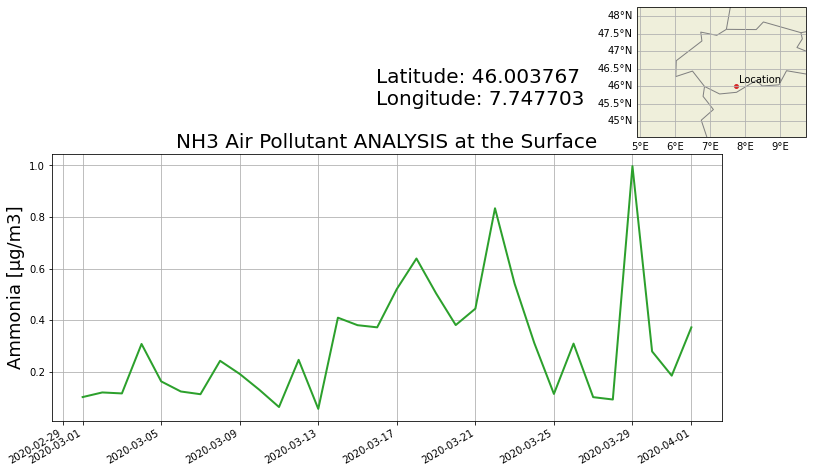

In [50]:
f = plt.figure(figsize=(12,12))
ax=f.add_subplot(211)

ax.set_title(ds_assign.title , fontsize=20)
ax.grid()
ax.set_ylabel(ds_assign[var_drop.value].species+' '+'['+ds_assign[var_drop.value].units+']', fontsize=18)
ax.plot(ds_assign.time, var,c='tab:green', linewidth=2)
f.suptitle('Latitude: '+str(lati)+' \nLongitude: '+str(loni),ha= 'left', fontsize=20)
f.autofmt_xdate()

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_boundary_lines_land',
        scale='110m',
        facecolor='none')
ax_mini_map = f.add_axes([0.8, 0.90, 0.2, 0.15], projection=ccrs.PlateCarree())
gl = ax_mini_map.axes.gridlines(draw_labels=True)
ax_mini_map.add_feature(states_provinces, edgecolor='gray')
gl.xlabels_top = False
gl.ylabels_right = False
ax_mini_map.add_feature(cfeature.LAND, zorder= 0, edgecolor='k')
ax_mini_map.set_extent([W-1,E+1,S-1,N+1])
ax_mini_map.scatter(loni, lati, 15, 'tab:red', transform=ccrs.PlateCarree())
ax_mini_map.annotate('Location', (loni, lati),xytext=(3, 3), textcoords='offset points')

<div class="alert alert-success" role="alert">
<span>&#x2714;</span>
<a id='libraries'></a>You have successfully run the Notebook workflow for Copernicus data access, browse, display and download using the WeKEO HDA API, adapted and extended to the CAMS European Air Quality Forecast dataset! 
</div>

----

<div class="alert alert-info" role="alert">

## <a id='sec6'></a>&#x27A4; 6. Example B - Sentinel-5P - Air quality
[Back to top](#TOC_TOP)

</div>

In this last example, we will see how to download data from the Sentinel-5P satellite, that aims to monitor air pollutants on a global scale.

This example summarizes everything seen in the previous examples. The final part will allow to access to the metadata associated with the satellite images, automatically download them and finally obtain a plot.

The dataset ID for Sentinel-5P is:

In [ ]:
dataset_id = 'EO:ESA:DAT:SENTINEL-5P:TROPOMI'

### Data preview

Let's generate the dataset preview, in the same way we did in the previous examples:

In [ ]:
size = 2000
dataset = requests.get("https://wekeo-broker-k8s.apps.mercator.dpi.wekeo.eu/databroker/datasets?size="+str(size))
data = json.loads(dataset.text)
data_df = pd.json_normalize(data['content'])
data_df = data_df[data_df['datasetId'] == dataset_id]
data_df

In this case we dont have a preview image and it's only possible to read the dataset description:

In [ ]:
# Get the dataset title from data_df
title = data_df.title.values[0]
# No image for S5P
# Get the description from data_df
description = list(data_df["abstract"])[0]

In [ ]:
# Create the boxes
title_box = widgets.HTML('<h2 style="text-align:center;font-size:18px;">'+title+'</h2>')
descr_box = widgets.HTML('<p style="text-align:justify;font-size:14px;">'+description+'</p>')

descr_box = widgets.VBox([title_box, descr_box])

# Create the Layout for the dataset preview
ui = widgets.AppLayout(right_sidebar=descr_box, layout=widgets.Layout(border='solid'))
container = widgets.Box([ui], layout=Layout(height='300px', overflow_y='auto'))
display(container)

### Requirements to create an interactive dashboard for Sentinel-5P

This dataset requires the following parameters:
- `Bounding Box`: Region of Intereset
- `Start-end date`
- `Processing level`: Level 1B/Level 2
- `Product type`: the type of product, such as NO2 or other pollutants
- `Timeliness`: Near Real Time, Offline, Reprocessing

### Accessing resource metadata

We can request the dataset `metadata`:

In [ ]:
dataset = requests.get("https://wekeo-broker-k8s.apps.mercator.dpi.wekeo.eu/databroker/querymetadata/"+dataset_id, headers=headers)
metadata = json.loads(dataset.text)
display(JSON(metadata))

### Create the widgets

Again to obtain the widgets, first we create the lists using the `metadata`. A `DatePicker` widget is used for the start/end date selection, wile a `SelectMultiple` widget is used for the other parameters:

In [ ]:
processing_level_list = list(metadata['parameters']['stringChoices'][0]['details']['valuesLabels'].keys())
product_type_list = list(metadata['parameters']['stringChoices'][1]['details']['valuesLabels'].keys())
timeliness_list = list(metadata['parameters']['stringChoices'][2]['details']['valuesLabels'].keys())

In [ ]:
style = {'description_width': '200px'}
layout = {'width': '800px'}
processing_level_sel = widgets.SelectMultiple(options=processing_level_list, description="Processing level:",disabled=False,style=style,layout=layout)
product_type_sel = widgets.SelectMultiple(options=product_type_list, description="Product type:",disabled=False,style=style,layout=layout)
timeliness_sel = widgets.SelectMultiple(options=timeliness_list, description="Timeliness: ",disabled=False,style=style,layout=layout)
start_date_sel = widgets.DatePicker(description="Select start date: ",disabled=False,style=style,layout=layout)
end_date_sel = widgets.DatePicker(description="Select end date: ",disabled=False,style=style,layout=layout)

### Bounding Box interactive selection

Select the Region of Intereset in the following map, always using the `Draw a rectangle`

In [ ]:
s5p_map, dc = m.draw_map(45, 10, 1)

s5p_map

In [ ]:
coords = dc.last_draw['geometry']['coordinates'][0]
W = coords[1][0]
E = coords[3][0]
N = coords[1][1]
S = coords[3][1]

In [ ]:
start_date = metadata['parameters']['dateRangeSelects'][0]['details']['start']
print("The start date for this dataset is: "+start_date)

### Create the dashboard and request the data

Print the dashboard and try to select the following parameter:
- `Processing level`: Level2
- `Product type`: L2__NO2__
- `Timeliness`: Near+real+time
- `Start/end dates`: 01/01/2021 - 03/01/2021

In [ ]:
%%html
<style>
.box {
    border: 2px solid #0b385f;
    font-weight: bold;
    background-color: hsl(0, 0%, 98%);
    color: #333;
}

In [ ]:
# Create boxes for the dashboard
title_box= widgets.HTML(value='<h2 style="text-align:center;">'+title+'</h2><hr>')
variables_box = widgets.VBox([title_box, processing_level_sel, product_type_sel, timeliness_sel, start_date_sel, end_date_sel])

# Create the dashboard 
ui = widgets.AppLayout(
          layout=widgets.Layout(),
          grid_gap="300px")

display(variables_box.add_class("box"))

In [ ]:
query = {
  "datasetId": dataset_id,
  "boundingBoxValues": [
    {
      "name": "bbox",
      "bbox": [W, S, E, N]
    }
  ],
  "dateRangeSelectValues": [
    {
      "name": "position",
      "start":  start_date_sel.value.strftime("%Y-%m-%dT%H:%M:%S.000Z"),
      "end": end_date_sel.value.strftime("%Y-%m-%dT%H:%M:%S.000Z")
    }
  ],
  "stringChoiceValues": [
    {
      "name": "processingLevel",
      "value": list(processing_level_sel.value)[0]
    },
    {
      "name": "productType",
      "value": list(product_type_sel.value)[0]
    },
    {
      "name": "timeliness",
      "value": list(timeliness_sel.value)[0]
    }
  ]
}
     
headers = {
    'Content-Type': 'application/json',
    'Accept': 'application/json',
    'authorization': 'Basic '+str(token)}

data = json.dumps(query)
dataset_post = requests.post("https://wekeo-broker-k8s.apps.mercator.dpi.wekeo.eu/databroker/datarequest", headers=headers, data=data)
job_id = json.loads(dataset_post.text)
jobId = job_id['jobId']
print("The job ID is: "+jobId)

In [ ]:
get_url_request = requests.get('https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/datarequest/status/'+jobId, headers=headers)
get_url = json.loads(get_url_request.text)
if get_url['status']=='completed':
    print('Status: Completed', end='\r')

while get_url['status']!='completed':
    get_url_request = requests.get('https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/datarequest/status/'+jobId, headers=headers)
    get_url = json.loads(get_url_request.text)
    if get_url['status']=='running':
        print('Status: Running', end='\r')
    elif get_url['status']=='failed':
        print('Status: Failed. Check data selected.')
        break
    elif get_url['status']=='completed':
        print('Status: Completed')

### Request Sentinel-5P data and read images metadata

This API endpoint provides a `JSON` file containing all the metadata associated to each product obtained from the query:

In [ ]:
headers = {'authorization': 'Basic '+str(token)}
get_url_request = requests.get('https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/datarequest/jobs/'+jobId+'/result?status=completed&size=2000', headers=headers)
get_url = json.loads(get_url_request.text)

Using IPython and the requested JSON file it is possible to visualize the metatada associated to each product:

In [ ]:
display(JSON(get_url['content']))

We can create a list of products and use a `Dropdown` widget to select one of them:

In [ ]:
s5p_list = []
for x in range(0,len(get_url['content'])):
    s5p_list.append(get_url['content'][x]['url'])

In [ ]:
s5p_drop =widgets.Dropdown(options=s5p_list, description="List of products URL: ",disabled=False,style={'description_width': '120px'},layout={'width': '900px'})
s5p_drop

### Order the data

Now we can order the data:

In [ ]:
url = s5p_drop.value

headers = {
    'Content-Type': 'application/json',
    'Accept': 'application/json',
    'authorization': 'Basic '+str(token)}

query = {
    "jobId":str(jobId),
    "uri":str(url)
    }

data = json.dumps(query)
dataset_post_order = requests.post("https://wekeo-broker-k8s.apps.mercator.dpi.wekeo.eu/databroker/dataorder", headers=headers, data=data)
order_id = json.loads(dataset_post_order.text)['orderId']
print('The order ID is: '+order_id)

### Download the data

At this step the order ID is used to download the data using the following `GET` request:

In [ ]:
headers = {'Accept': 'application/zip'}

response_order = requests.get("https://wekeo-broker-k8s.apps.mercator.dpi.wekeo.eu/databroker/dataorder/download/"+order_id, headers=headers)

The file can be saved as a compressed folder (zip format) using the original data name:

In [ ]:
zip_filename = url[url.find('/')+1:]

with open(zip_filename, 'wb') as zfile:
    zfile.write(response_order.content)
zip_filename

It's possible to unzip the Sentinel-5P folder in the working directory:

In [ ]:
with zipfile.ZipFile(zip_filename,"r") as zip_ref:
    zip_ref.extractall(zip_filename[0:-4])

And select the netCDF file contained in its folder:

In [ ]:
path = "./"+zip_filename[0:-4]+"/"+zip_filename[0:-4]
nc_files = [f for f in os.listdir(path) if f.endswith('.nc')]
nc_drop = widgets.Dropdown(options=nc_files, description="netCDF filename: ",disabled=False,style={'description_width': '120px'},layout={'width': '830px'})
nc_drop

Read the netCDF file:

In [ ]:
nc_file = path+"/"+nc_drop.value
fh = Dataset(nc_file, mode='r') #read netCDF file

### Visualize the data

First, let's create the list of variables contained in the netCDF file (`fh`) and select the variable of interest (e.g. nitrogendioxide_tropospheric_column):

In [ ]:
product_list = list(fh.groups['PRODUCT'].variables.keys())
products_drop = widgets.Dropdown(options=product_list, description="List of products: ",disabled=False,style={'description_width': '100px'},layout={'width': '400px'})
products_drop

Save the latitude, longitude and the values inside the following variables:

In [ ]:
lons = fh.groups['PRODUCT'].variables['longitude'][:][0,:,:]
lats = fh.groups['PRODUCT'].variables['latitude'][:][0,:,:]
prod = fh.groups['PRODUCT'].variables[products_drop.value][0,:,:]
print (lons.shape)  #check shape
print (lats.shape)
print (prod.shape)

units = fh.groups['PRODUCT'].variables[products_drop.value].units

It's now possible to plot the data:

In [ ]:
lon_0 = lons.mean()
lat_0 = lats.mean()
plt.figure(figsize=(20,20))
map1 = Basemap(width=5000000,height=3500000,
            resolution='i',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

xi, yi = map1(lons, lats)

# Plot Data

cs = map1.pcolor(xi,yi,np.squeeze(prod), cmap='jet')

# Add Grid Lines
map1.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=12)
map1.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=12)

# Add boundaries and coastlines
map1.drawcoastlines()
map1.drawstates()
map1.drawcountries()

# Cbar
cbar = map1.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(units)

# Title
plt.title(products_drop.value)
plt.show()

<div class="alert alert-success" role="alert">
<span>&#x2714;</span>
<a id='libraries'></a>You have successfully run the Notebook workflow for Copernicus data access, browse, display and download using the WeKEO HDA API, adapted and extended to the Setinel 5-p dataset! 
</div>

----